In [1]:
# STEP 1: Importing the Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:

# STEP 2: Importing the California Housing Dataset
house_price_dataset = sklearn.datasets.fetch_california_housing()

# Displaying the dataset
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [3]:

# Converting the dataset into a DataFrame
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns=house_price_dataset.feature_names)

# Adding target column (Price) to the dataframe
house_price_dataframe['price'] = house_price_dataset.target


In [4]:

# Displaying the first few rows of the dataframe
house_price_dataframe.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:

# Checking the shape of the dataframe
print(house_price_dataframe.shape)


(20640, 9)


In [6]:

# Checking for missing values
print(house_price_dataframe.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64


In [7]:

# Descriptive statistics
print(house_price_dataframe.describe())


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

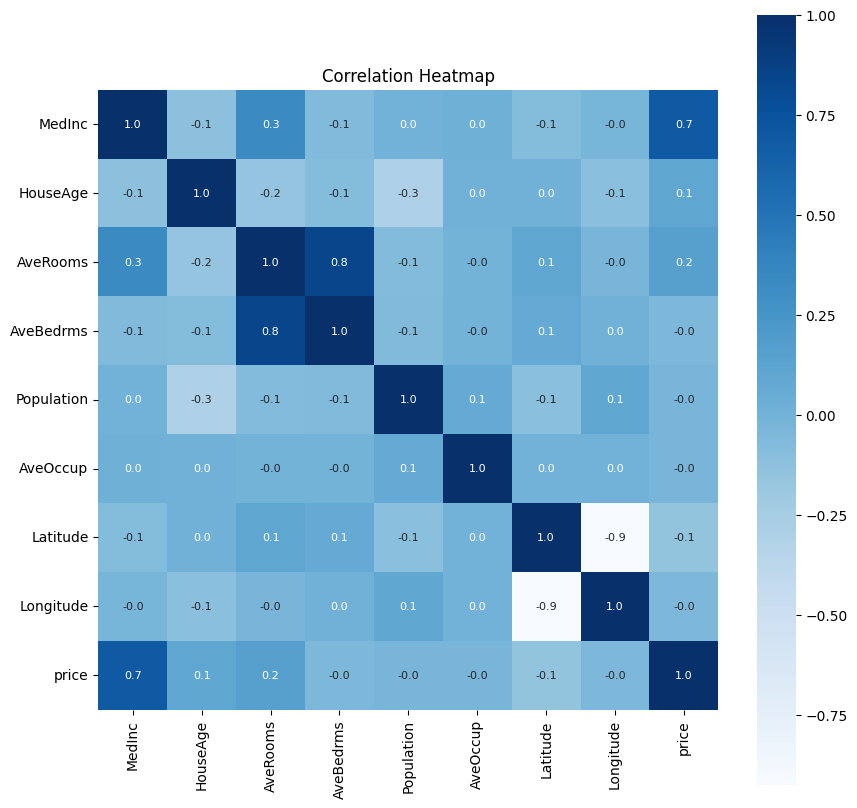

In [8]:

# Correlation Heatmap
correlation = house_price_dataframe.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


In [9]:

# STEP 3: Train Test Split
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Checking the shapes of the splits
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [10]:

# STEP 4: Model Selection - XGBoost and Linear Regression
# XGBoost Model
xgb_model = XGBRegressor()

# Fitting the XGBoost model
xgb_model.fit(X_train, Y_train)

# Predicting on training data
training_data_prediction_xgb = xgb_model.predict(X_train)

# Evaluating XGBoost Model (Training Data)
score_1_xgb_train = metrics.r2_score(Y_train, training_data_prediction_xgb)
score_2_xgb_train = metrics.mean_absolute_error(Y_train, training_data_prediction_xgb)

print("XGBoost R squared error (Training): ", score_1_xgb_train)
print('XGBoost Mean Absolute Error (Training): ', score_2_xgb_train)


XGBoost R squared error (Training):  0.943650140819218
XGBoost Mean Absolute Error (Training):  0.1933648700612105


In [11]:

# Predicting on test data
test_data_prediction_xgb = xgb_model.predict(X_test)

# Evaluating XGBoost Model (Test Data)
score_1_xgb_test = metrics.r2_score(Y_test, test_data_prediction_xgb)
score_2_xgb_test = metrics.mean_absolute_error(Y_test, test_data_prediction_xgb)

print("XGBoost R squared error (Test): ", score_1_xgb_test)
print('XGBoost Mean Absolute Error (Test): ', score_2_xgb_test)

XGBoost R squared error (Test):  0.8338000331788725
XGBoost Mean Absolute Error (Test):  0.3108631800268186


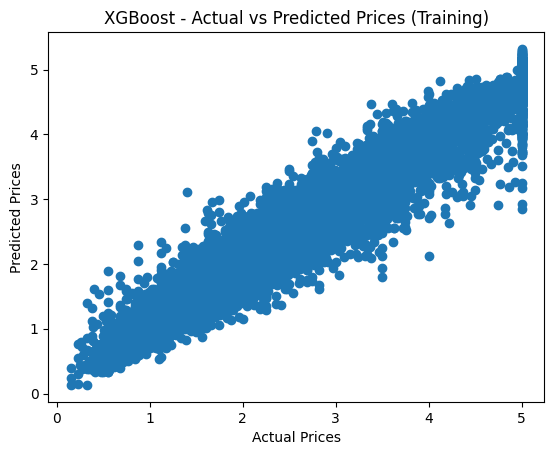

In [12]:

# Visualising Actual vs Predicted Prices for XGBoost (Training Data)
plt.scatter(Y_train, training_data_prediction_xgb)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("XGBoost - Actual vs Predicted Prices (Training)")
plt.show()


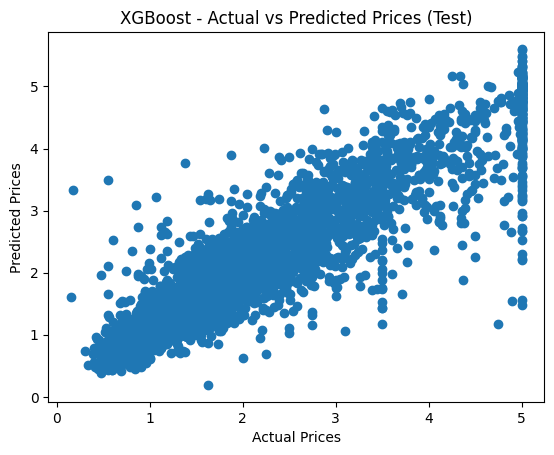

In [13]:

# Visualising Actual vs Predicted Prices for XGBoost (Test Data)
plt.scatter(Y_test, test_data_prediction_xgb)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("XGBoost - Actual vs Predicted Prices (Test)")
plt.show()


In [14]:

# Linear Regression Model
lr_model = LinearRegression()

# Fitting the Linear Regression model
lr_model.fit(X_train, Y_train)

LinearRegression()

In [15]:

# Predicting on training data
training_data_prediction_lr = lr_model.predict(X_train)

# Evaluating Linear Regression Model (Training Data)
score_1_lr_train = metrics.r2_score(Y_train, training_data_prediction_lr)
score_2_lr_train = metrics.mean_absolute_error(Y_train, training_data_prediction_lr)

print("Linear Regression R squared error (Training): ", score_1_lr_train)
print('Linear Regression Mean Absolute Error (Training): ', score_2_lr_train)

Linear Regression R squared error (Training):  0.6068205998456939
Linear Regression Mean Absolute Error (Training):  0.5303857028686891


In [16]:

# Predicting on test data
test_data_prediction_lr = lr_model.predict(X_test)

# Evaluating Linear Regression Model (Test Data)
score_1_lr_test = metrics.r2_score(Y_test, test_data_prediction_lr)
score_2_lr_test = metrics.mean_absolute_error(Y_test, test_data_prediction_lr)

print("Linear Regression R squared error (Test): ", score_1_lr_test)
print('Linear Regression Mean Absolute Error (Test): ', score_2_lr_test)

Linear Regression R squared error (Test):  0.6013853272055152
Linear Regression Mean Absolute Error (Test):  0.5358292549657769


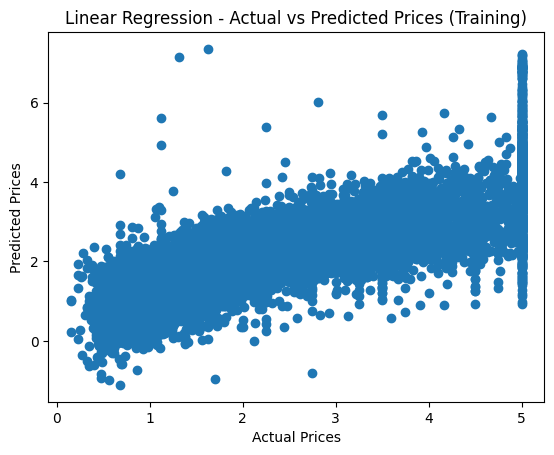

In [17]:

# Visualising Actual vs Predicted Prices for Linear Regression (Training Data)
plt.scatter(Y_train, training_data_prediction_lr)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression - Actual vs Predicted Prices (Training)")
plt.show()


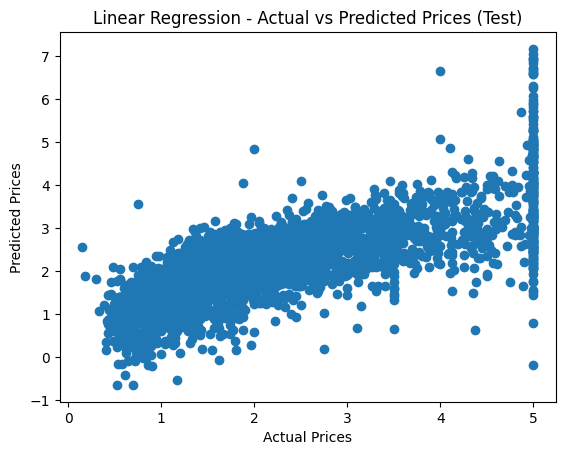

In [18]:

# Visualising Actual vs Predicted Prices for Linear Regression (Test Data)
plt.scatter(Y_test, test_data_prediction_lr)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression - Actual vs Predicted Prices (Test)")
plt.show()


In [19]:

# STEP 5: Checking for Overfitting or Underfitting

# For XGBoost
print("XGBoost Model - Train R2: ", score_1_xgb_train, " | Test R2: ", score_1_xgb_test)
print("XGBoost Model - Train MAE: ", score_2_xgb_train, " | Test MAE: ", score_2_xgb_test)

# For Linear Regression
print("Linear Regression - Train R2: ", score_1_lr_train, " | Test R2: ", score_1_lr_test)
print("Linear Regression - Train MAE: ", score_2_lr_train, " | Test MAE: ", score_2_lr_test)

# Observations:
# 1. If the training R2 is much higher than the test R2, this could indicate overfitting.
# 2. If both the training and test R2 are low, this could indicate underfitting.
# 3. A good model would show similar R2 values for both training and test sets, with a relatively low MAE.


XGBoost Model - Train R2:  0.943650140819218  | Test R2:  0.8338000331788725
XGBoost Model - Train MAE:  0.1933648700612105  | Test MAE:  0.3108631800268186
Linear Regression - Train R2:  0.6068205998456939  | Test R2:  0.6013853272055152
Linear Regression - Train MAE:  0.5303857028686891  | Test MAE:  0.5358292549657769
